# Illustration of the transformation for simple SVD in Julia #

We start by creating a noisy version of a rank $1$ non symmetric matrix, where the noise is distributed with a Cauchy distribution

In [96]:
using PyPlot
m=500;
n=200;
lambda=0.4;

U=sign(randn(m,1));
V=randn(n,1);
J=U*V'/sqrt(n);
noise=tan(pi*(rand(m,n)-0.5));
J=J+lambda*noise;

Now we either do the svd on the data $J$, or with the transform matrix $\frac J{1+J^2}$

In [100]:
l,v=svd(J);
effective_data=J./(1+J.^2)
l2,v2=svd(effective_data);

Let's plot the histogram of singular values in both cases

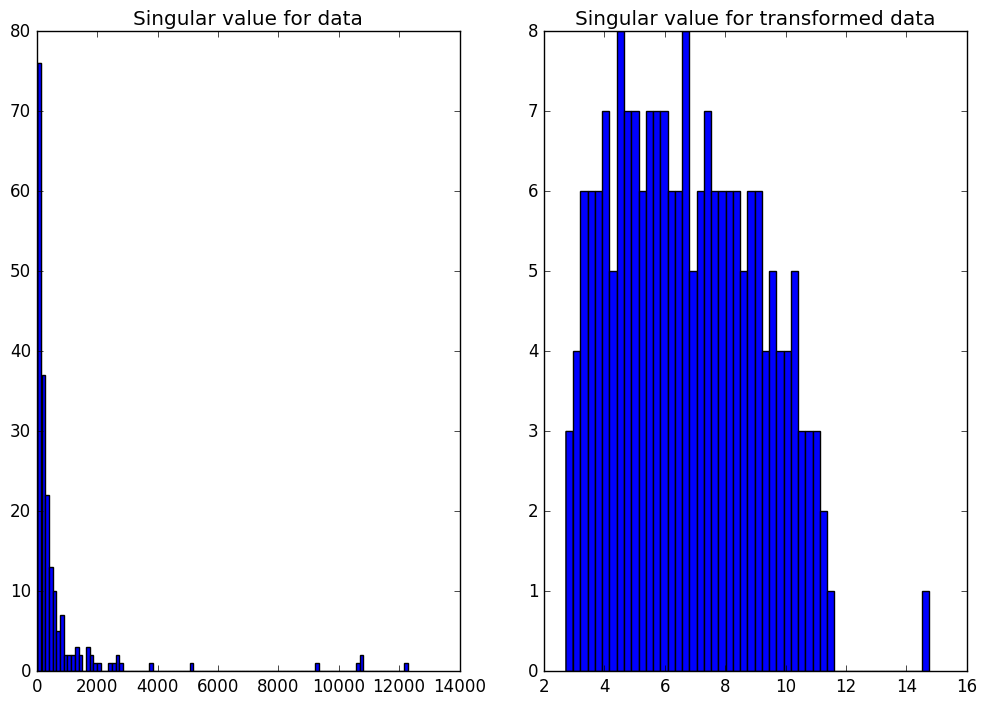

In [101]:
nbins=50;
fig, axes = subplots(1, 2, figsize=(12, 8));
ax = axes[1,1];
ax[:hist](v,2*nbins);
ax[:set_title]("Singular value for data");
ax = axes[2,1];
ax[:hist](v2,nbins);
ax[:set_title]("Singular value for transformed data");

For transformed data, the rank $1$ nature of the problem is clear, while for the standard svd this is somehow lost.